<a href="https://colab.research.google.com/github/kazakan/2019_spring_jgp/blob/master/src/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 

MODE = "COLAB"

if MODE.upper() == "COLAB":

    from google.colab import drive
    drive.mount('/content/drive')

    os.chdir("/content/drive/MyDrive/ml/Kaggle-AMEX-Default-Prediction/src")

print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ml/Kaggle-AMEX-Default-Prediction/src


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%%time

df_train = pd.read_feather("../data/train_data.ftr")
df_train_label = pd.read_csv("../data/train_labels.csv")

CPU times: user 9.21 s, sys: 5.49 s, total: 14.7 s
Wall time: 21 s


# train

https://www.kaggle.com/competitions/amex-default-prediction/data

What column prefix means.

- D_* = Delinquency variables
- S_* = Spend variables
- P_* = Payment variables
- B_* = Balance variables
- R_* = Risk variables

Categorical columns.
- ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 

Datetime columns
- ['S_2']

Other columns are float type.

## Columns with high NaN ratio

Columns whose ratio of nan value is over 30%.

- D_42 : float16 / Na ratio : 0.86
- D_49 : float16 / Na ratio : 0.90
- D_50 : float16 / Na ratio : 0.57
- D_53 : float16 / Na ratio : 0.74
- D_56 : float16 / Na ratio : 0.54
- S_9 : float16 / Na ratio : 0.53
- B_17 : float16 / Na ratio : 0.57
- D_66 : category / Na ratio : 0.89
- D_73 : float16 / Na ratio : 0.99
- D_76 : float16 / Na ratio : 0.89
- D_77 : float16 / Na ratio : 0.45
- R_9 : float16 / Na ratio : 0.94
- D_82 : float16 / Na ratio : 0.73
- B_29 : float16 / Na ratio : 0.93
- D_87 : float16 / Na ratio : 1.00
- D_88 : float16 / Na ratio : 1.00
- D_105 : float16 / Na ratio : 0.55
- D_106 : float16 / Na ratio : 0.90
- R_26 : float16 / Na ratio : 0.89
- D_108 : float16 / Na ratio : 0.99
- D_110 : float16 / Na ratio : 0.99
- D_111 : float16 / Na ratio : 0.99
- B_39 : float16 / Na ratio : 0.99
- B_42 : float16 / Na ratio : 0.99
- D_132 : float16 / Na ratio : 0.90
- D_134 : float16 / Na ratio : 0.96
- D_135 : float16 / Na ratio : 0.96
- D_136 : float16 / Na ratio : 0.96
- D_137 : float16 / Na ratio : 0.96
- D_138 : float16 / Na ratio : 0.96
- D_142 : float16 / Na ratio : 0.83

In [4]:
print("# of Rows : ",len(df_train))
print("# of Columns : ", len(df_train.columns))
print(list(df_train.columns))

# of Rows :  5531451
# of Columns :  191
['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18', 'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'B_33', 'D_89', 'R_22', 'R_

In [5]:
cols_nan_over_30 = []

print("Column dtypes & nan ratio")
for col in df_train.columns:
    na_count = df_train[col].isna().sum()
    na_ratio = na_count / len(df_train)
    if na_ratio >= 0.3 : cols_nan_over_30.append(col)
    print("-",col,":",df_train[col].dtype, end=" / ")
    print("# Na :",na_count, end=" / ")
    print("Na ratio : {:.2f}".format(na_ratio))

Column dtypes & nan ratio
- customer_ID : object / # Na : 0 / Na ratio : 0.00
- S_2 : datetime64[ns] / # Na : 0 / Na ratio : 0.00
- P_2 : float16 / # Na : 45985 / Na ratio : 0.01
- D_39 : float16 / # Na : 0 / Na ratio : 0.00
- B_1 : float16 / # Na : 0 / Na ratio : 0.00
- B_2 : float16 / # Na : 2016 / Na ratio : 0.00
- R_1 : float16 / # Na : 0 / Na ratio : 0.00
- S_3 : float16 / # Na : 1020544 / Na ratio : 0.18
- D_41 : float16 / # Na : 2016 / Na ratio : 0.00
- B_3 : float16 / # Na : 2016 / Na ratio : 0.00
- D_42 : float16 / # Na : 4740137 / Na ratio : 0.86
- D_43 : float16 / # Na : 1658396 / Na ratio : 0.30
- D_44 : float16 / # Na : 274319 / Na ratio : 0.05
- B_4 : float16 / # Na : 0 / Na ratio : 0.00
- D_45 : float16 / # Na : 2017 / Na ratio : 0.00
- B_5 : float16 / # Na : 0 / Na ratio : 0.00
- R_2 : float16 / # Na : 0 / Na ratio : 0.00
- D_46 : float16 / # Na : 1211699 / Na ratio : 0.22
- D_47 : float16 / # Na : 0 / Na ratio : 0.00
- D_48 : float16 / # Na : 718725 / Na ratio : 0.13
-

In [6]:
df_train.head(20)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945801,0.001746,0.007866,1.004883,0.004219,0.110962,0.009857,0.009865,...,NaN,NaN,0.001925,0.008598,0.004528,NaN,0.000674,0.002222,0.002884,0
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940918,0.002182,0.018860,1.007812,0.004509,0.103333,0.006603,0.000783,...,NaN,NaN,0.001336,0.004360,0.009384,NaN,0.007729,0.007660,0.002224,0
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914551,0.003029,0.014328,1.000000,0.000263,0.108093,0.009529,0.007835,...,NaN,NaN,0.002398,0.008453,0.005554,NaN,0.001831,0.009613,0.007385,0
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950684,0.009895,0.016891,1.003906,0.001789,0.102783,0.002520,0.009819,...,NaN,NaN,0.009743,0.003967,0.007942,NaN,0.008720,0.004368,0.000996,0
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868652,0.001082,0.001930,1.007812,0.001772,0.100464,0.004627,0.006073,...,NaN,NaN,0.003611,0.009605,0.007267,NaN,0.008766,0.004753,0.009071,0


In [7]:
df_train.tail(20)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
5531431,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-09-03,0.793457,0.301025,0.024704,0.182861,0.000660,0.200806,0.005322,0.105042,...,NaN,NaN,1.000977,0.004185,0.939941,0.415039,1.000977,0.009163,0.183228,1
5531432,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-10-22,0.791504,0.002768,0.025238,1.003906,0.009834,0.379395,0.006599,0.095520,...,NaN,NaN,1.006836,0.009560,0.939941,0.424561,1.007812,0.001185,0.183960,1
5531433,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-11-17,0.788086,0.004490,0.022125,1.000977,0.003452,0.472900,0.004425,0.044098,...,NaN,NaN,1.000977,0.009323,0.941406,0.427246,1.006836,0.004421,0.190796,1
5531434,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-12-11,0.790039,0.001332,0.029205,1.005859,0.002905,0.494385,0.001444,0.039642,...,NaN,NaN,1.005859,0.003937,0.946777,0.427246,1.003906,0.007122,0.185791,1
5531435,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-01-25,0.787598,0.030945,0.015511,0.209473,0.008003,0.609375,0.008972,0.083679,...,NaN,NaN,1.009766,0.008911,0.940918,0.433838,1.002930,0.007103,0.182617,1
5531436,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-02-15,0.754395,0.001509,0.025986,0.206909,0.009384,0.425781,0.007431,0.087280,...,NaN,NaN,1.003906,0.005161,0.940918,0.435059,1.000977,0.004326,0.189697,1
5531437,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-03-23,0.753906,0.008621,0.015839,0.714355,0.000993,0.408936,0.003391,0.050049,...,NaN,NaN,1.009766,0.004478,0.949707,0.446289,1.009766,0.002502,0.185547,1
5531438,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-03-20,0.999023,0.208130,0.119507,1.009766,0.002409,-0.007298,0.005028,0.055878,...,NaN,NaN,0.004192,0.005775,0.007168,NaN,0.009377,0.007523,0.008011,0
5531439,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-04-20,1.000000,0.240601,0.090454,0.239014,0.003122,-0.012421,0.005150,0.070251,...,NaN,NaN,0.004391,0.000838,0.005024,NaN,0.000947,0.005936,0.003523,0
5531440,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-05-08,0.995117,0.504883,0.056335,0.276367,0.004391,-0.010590,0.005737,0.055695,...,NaN,NaN,0.009933,0.001796,0.004787,NaN,0.003712,0.001371,0.003975,0


In [8]:
grouped = df_train.groupby('customer_ID')

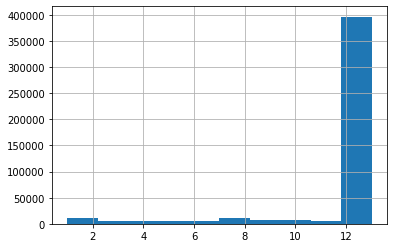

In [9]:
grouped['S_2'].agg('count').hist()

In [10]:
## cols with naan and target

In [11]:
isna = df_train.isna().values
sna = isna.sum(axis=0)
snna = (~isna).sum(axis=0)
target = df_train['target'].values[:,np.newaxis]

In [12]:
tt = np.logical_and(isna,target.astype(bool))
tf = np.logical_and(isna,~target.astype(bool))
ft = np.logical_and(~isna,target.astype(bool))
ff = np.logical_and(~isna,~target.astype(bool))

In [13]:
pd

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

In [14]:
tt.sum(axis=0) / sna

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 0.25608351,        nan,        nan,
       0.35615079,        nan, 0.10639032, 0.35615079, 0.35615079,
       0.2075094 , 0.1672568 , 0.24061403,        nan, 0.35597422,
              nan,        nan, 0.19403664,        nan, 0.12205085,
       0.21616826, 0.25321888,        nan, 0.30438297, 0.30053348,
              nan,        nan,        nan, 0.35226466, 0.44389238,
              nan, 0.18357263,        nan,        nan,        nan,
       0.35615079,        nan, 0.10639032,        nan,        nan,
       0.17590082, 0.32820652, 0.49059957,        nan,        nan,
       0.27185176,        nan, 0.42181307,        nan, 0.0848555 ,
       0.08580095,        nan, 0.11273067,        nan,        nan,
              nan, 0.35615079, 0.12262438,        nan, 0.35615079,
       0.25717136, 0.35615079, 0.4144931 ,        nan,        nan,
              nan,        nan, 0.43077959, 0.35615079, 0.4203462 ,
              nan, 0.34950228,        nan,        nan, 0.24781

In [15]:
tf.sum(axis=0) / sna

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 0.74391649,        nan,        nan,
       0.64384921,        nan, 0.89360968, 0.64384921, 0.64384921,
       0.7924906 , 0.8327432 , 0.75938597,        nan, 0.64402578,
              nan,        nan, 0.80596336,        nan, 0.87794915,
       0.78383174, 0.74678112,        nan, 0.69561703, 0.69946652,
              nan,        nan,        nan, 0.64773534, 0.55610762,
              nan, 0.81642737,        nan,        nan,        nan,
       0.64384921,        nan, 0.89360968,        nan,        nan,
       0.82409918, 0.67179348, 0.50940043,        nan,        nan,
       0.72814824,        nan, 0.57818693,        nan, 0.9151445 ,
       0.91419905,        nan, 0.88726933,        nan,        nan,
              nan, 0.64384921, 0.87737562,        nan, 0.64384921,
       0.74282864, 0.64384921, 0.5855069 ,        nan,        nan,
              nan,        nan, 0.56922041, 0.64384921, 0.5796538 ,
              nan, 0.65049772,        nan,        nan, 0.75218

In [16]:
ft.sum(axis=0) / snna

array([0.24909721, 0.24909721, 0.24903864, 0.24909721, 0.24909721,
       0.24905818, 0.24909721, 0.2813831 , 0.24905818, 0.24905818,
       0.49821689, 0.2841403 , 0.24953986, 0.24909721, 0.24905822,
       0.24909721, 0.24909721, 0.26454181, 0.24909721, 0.26807011,
       0.55005188, 0.24909703, 0.24909721, 0.24887374, 0.18144123,
       0.24909721, 0.24909721, 0.24909721, 0.24854286, 0.23786783,
       0.24909721, 0.43407683, 0.24909721, 0.24909721, 0.24909721,
       0.24905818, 0.24909721, 0.2813831 , 0.24909721, 0.24909721,
       0.25162719, 0.15596172, 0.24691569, 0.24909721, 0.24909721,
       0.22340104, 0.24909721, 0.24569923, 0.24909721, 0.26900743,
       0.24930184, 0.24909721, 0.27075686, 0.24909721, 0.24909721,
       0.24909721, 0.24905818, 0.41486382, 0.24909721, 0.24905818,
       0.1855238 , 0.24905818, 0.24235985, 0.24909721, 0.24909721,
       0.24909721, 0.24909721, 0.24247692, 0.24905818, 0.24610735,
       0.24909721, 0.24866502, 0.24909721, 0.24909721, 0.37526

In [17]:
ff.sum(axis=0) / snna

array([0.75090279, 0.75090279, 0.75096136, 0.75090279, 0.75090279,
       0.75094182, 0.75090279, 0.7186169 , 0.75094182, 0.75094182,
       0.50178311, 0.7158597 , 0.75046014, 0.75090279, 0.75094178,
       0.75090279, 0.75090279, 0.73545819, 0.75090279, 0.73192989,
       0.44994812, 0.75090297, 0.75090279, 0.75112626, 0.81855877,
       0.75090279, 0.75090279, 0.75090279, 0.75145714, 0.76213217,
       0.75090279, 0.56592317, 0.75090279, 0.75090279, 0.75090279,
       0.75094182, 0.75090279, 0.7186169 , 0.75090279, 0.75090279,
       0.74837281, 0.84403828, 0.75308431, 0.75090279, 0.75090279,
       0.77659896, 0.75090279, 0.75430077, 0.75090279, 0.73099257,
       0.75069816, 0.75090279, 0.72924314, 0.75090279, 0.75090279,
       0.75090279, 0.75094182, 0.58513618, 0.75090279, 0.75094182,
       0.8144762 , 0.75094182, 0.75764015, 0.75090279, 0.75090279,
       0.75090279, 0.75090279, 0.75752308, 0.75094182, 0.75389265,
       0.75090279, 0.75133498, 0.75090279, 0.75090279, 0.62473

# Group by customer id

In [ ]:
cols = df_train.columns[:-1]
agged = df_train[cols].groupby('customer_ID').agg(['max','last','min'])

In [ ]:
agged